# Markov Logic Network Recommender - Test Notebook

This notebook demonstrates how to use the MLN recommender class extracted from the original implementation.


In [1]:
from mln_recommender import MarkovLogicNetworkwithUserGenreModel

import sys
import os
sys.path.append(os.path.abspath('..'))
from eval_framework.reporter import MLNRecommenderReporter as RecommenderReporter
from eval_framework.data_loader import load_data, split_data


## Load and Split Data

In [2]:
# Load and preprocess data
ratings, movies = load_data()  # Use all users
train_ratings, test_ratings = split_data(ratings)

Loading data...
Loaded 100836 ratings and 9742 movies
\nSplitting data...
Training set size: 80668, Test set size: 20168


## Initialize and Train Model


In [3]:
model = MarkovLogicNetworkwithUserGenreModel()
model.fit(train_ratings, movies)

Extracting user preferences...
Mining frequent patterns...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Generating logic rules...
Calculating movie statistics...


## Evaluate Model

In [4]:
reporter = RecommenderReporter()
result = reporter.evaluate_model(model, test_ratings, batch_size=1000, n_jobs=-1)

print(result)

Evaluating queries: : 21000it [04:03, 86.40it/s]                          


{'mse': 1.5943841847323197, 'rmse': np.float64(1.262689266895193), 'mae': 0.9455165315179257, 'predictions': 0        3.627801
1        4.093421
2        3.619773
3        3.029311
4        4.170033
           ...   
20163    3.528668
20164    3.498735
20165    4.344343
20166    3.256594
20167    4.165831
Name: rating, Length: 20168, dtype: float64, 'actuals': 67037    4.5
42175    3.0
93850    3.0
6187     4.0
12229    4.0
        ... 
57416    2.0
67290    3.5
33423    4.5
98552    3.0
87803    3.0
Name: rating, Length: 20168, dtype: float64}


## Visualize Result


Generating universal plots...


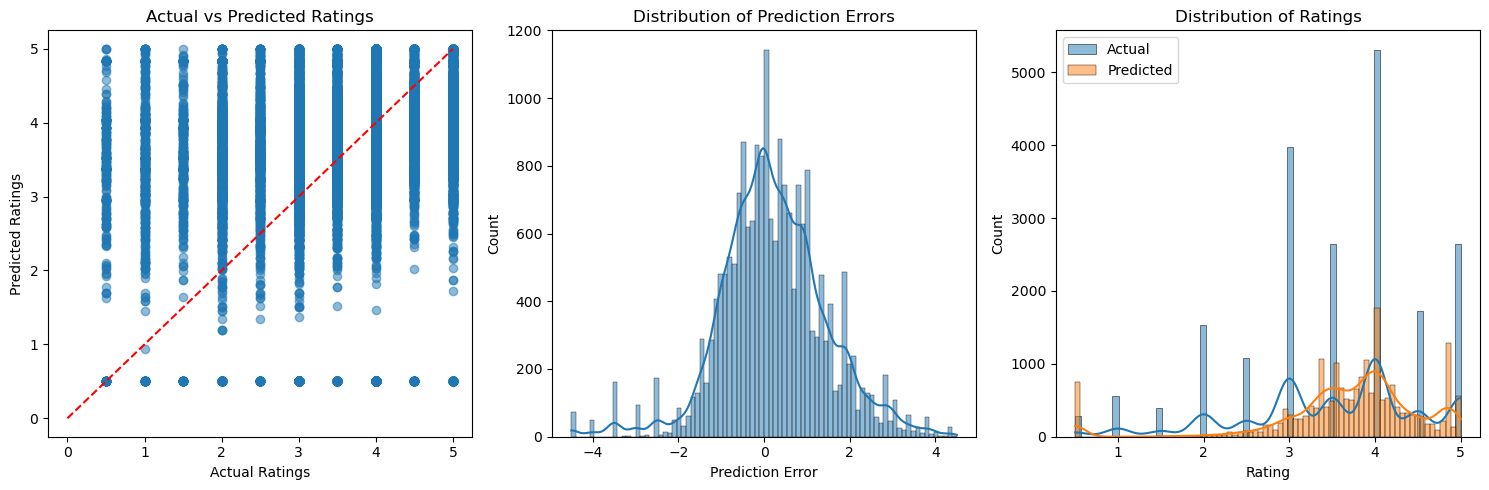

In [5]:
reporter.plot_all()

In [6]:
reporter.print_stats()


Universal Evaluation Metrics:
MSE: 1.5944
RMSE: 1.2627
MAE: 0.9455
